# Binary Search Trees

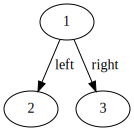

In [2]:
# root: any node with no parents
# leaf: any node with no children
# tree: is a DAG (directed acyclic graph) with only one root; any other nodes have exactly one parent

from graphviz import Digraph
g = Digraph()
g.edge("1", "2", label="left")
g.edge("1", "3", label="right")
g

# linked list: a tree, where each node has at MOST one child
# binary tree:  a tree, where each has at MOST two children

In [24]:
class Node:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    
    # situation 2: a function that does something (e.g., printing)
    # prints out name of every node in the tree
    def dump(self, prefix="", suffix=""):
        print(prefix, self.label, suffix)
        if self.left != None:
            self.left.dump(prefix+"\t", "(LEFT)")
        if self.right != None:
            self.right.dump(prefix+"\t", "(RIGHT)")
            
    # situation 1: a function that returns something
    # return True/False, if target is somewhere in the tree
    def search(self, target):
        print("CHECK", self.label)
        if target == self.label:
            return True

        if self.left != None:
            if self.left.search(target):
                return True
        
        if self.right != None:
            if self.right.search(target):
                return True
        
        return False

node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)
node1.left = node2
node1.right = node3
node2.left = node4
node1.dump()
node1.search(3) # should be True

# how many times is search(...) called, in the worst case?  Assume N nodes.  N times.
# complexity is O(N)

 1 
	 2 (LEFT)
		 4 (LEFT)
	 3 (RIGHT)
CHECK 1
CHECK 2
CHECK 4
CHECK 3


True

In [37]:
class Node:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    
    # situation 2: a function that does something (e.g., printing)
    # prints out name of every node in the tree
    def dump(self, prefix="", suffix=""):
        print(prefix, self.label, suffix)
        if self.left != None:
            self.left.dump(prefix+"\t", "(LEFT)")
        if self.right != None:
            self.right.dump(prefix+"\t", "(RIGHT)")
            
    # situation 1: a function that returns something
    # return True/False, if target is somewhere in the tree
    def search(self, target):
        if target == self.label:
            return True

        if target < self.label:
            if self.left != None:
                if self.left.search(target):
                    return True

        elif target > self.label:
            if self.right != None:
                if self.right.search(target):
                    return True
        
        return False

root = Node(10)
root.left = Node(2)
root.left.left = Node(1)
root.left.right = Node(4)
root.left.right.right = Node(8)
root.left.right.left = Node(3)
root.right = Node(15)
root.right.left = Node(12)
root.right.right = Node(19)
#root.right.left.left = Node(8)
root.dump()
root.search(123)

 10 
	 2 (LEFT)
		 1 (LEFT)
		 4 (RIGHT)
			 3 (LEFT)
			 8 (RIGHT)
	 15 (RIGHT)
		 12 (LEFT)
		 19 (RIGHT)


False

In [26]:
# BST (Binary Search Tree):
# 1. BST rule: any node's value is bigger than every value in its left subtree, and
#              and smaller than every value in its right subtree
# 2. write an efficient search for a BST
# 3. write a method to add values to a BST, while preserving the BST rule

In [ ]:
# BST (binary search tree) search: find a value; restrict structure of tree for efficient search
# DFS (depth-first search): find a path from one node to another -- any directed graph is OK

In [49]:
# functions:
# add()
# height()

class Node:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    
    # situation 2: a function that does something (e.g., printing)
    # prints out name of every node in the tree
    def dump(self, prefix="", suffix=""):
        print(prefix, self.label, suffix)
        if self.left != None:
            self.left.dump(prefix+"\t", "(LEFT)")
        if self.right != None:
            self.right.dump(prefix+"\t", "(RIGHT)")
            
    # situation 1: a function that returns something
    # return True/False, if target is somewhere in the tree
    def search(self, target):
        if target == self.label:
            return True

        if target < self.label:
            if self.left != None:
                if self.left.search(target):
                    return True

        elif target > self.label:
            if self.right != None:
                if self.right.search(target):
                    return True
        
        return False
    
    def add(self, label):
        if label < self.label:
            # add it to the left subtree
            if self.left == None:
                self.left = Node(label)
            else:
                self.left.add(label)
        elif label > self.label:
            # add it the right subtree
            if self.right == None:
                self.right = Node(label)
            else:
                self.right.add(label)
                
    def height(self):
        # left subtree has height 4, right subtree has height 6, my height=7
        # left subtree has height 4, right subtree has height 4, my height=5
        # left subtree has height 10, right subtree has height 0, my height=11
        # left subtree has height of X, right subtree has height of Y, my height=max(x,y)+1
        if self.left != None:
            x = self.left.height()
        else:
            x = 0
        if self.right != None:
            y = self.right.height()
        else:
            y = 0
        return max(x,y)+1

values = [3,1,7,9,8,2]
root = Node(values[0])
for v in values[1:]:
    root.add(v)
    
root.dump()
root.height() # should be 4

 3 
	 1 (LEFT)
		 2 (RIGHT)
	 7 (RIGHT)
		 9 (RIGHT)
			 8 (LEFT)


4

In [52]:
values = list(range(100))
values.sort()
root = Node(values[0])
for v in values[1:]:
    root.add(v)
    
root.height() # tall, which is slow

100

In [53]:
import random

values = list(range(100))
random.shuffle(values)
root = Node(values[0])
for v in values[1:]:
    root.add(v)
    
root.height() # tall, which is slow

14